# Creating a MOCK datasets
Author: Karina Condeixa
__________________________________________

**[WIP]**


1- Initialization of random user and item matrix.

2- Ratings matrix is obtained by multiplying the user and the transposed item matrix.

3- The goal of matrix factorization is to minimize the loss function (the difference in the ratings of the predicted and actual matrices must be minimal). Each rating can be described as a dot product of row in user matrix and column in item matrix.



The process to create a fake dataset started by making dataframes about `users` and `item`, and further a complete dataframe that could be used in the `model`.

`numpy random` and `faker` were used to ccreate randomized series. Latitude_longitude points were picked using a polygons method, consideing four points choosen manually in Google Maps.

_________________________________

**TODO:**
- using this [reference](https://thingsolver.com/introduction-to-recommender-systems/)
- do Matrix factorization
- encoding
- save the files as csv
- review the discription in the begining


In [162]:
# import packages
import pandas as pd
from faker import Faker, providers
from faker.providers.address.de_DE import Provider as DeDeAddressProvider
from faker.generator import random
from faker.providers import BaseProvider
# import random

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib notebook
# %matplotlib 

import folium
# from geopy.geocoders import Nominatim

### Postcodes

In [163]:
# immport and clean original dataset removing poostcodes from Germanay, that are not in Berlin
postcodes_de = pd.read_excel(r'data/German-Zip-Codes.xlsx', sheet_name='Berlin')
df = pd.DataFrame(postcodes_de)
df.set_axis(["postcodes_berlin"], axis=1,inplace=True)
df = (df["postcodes_berlin"].str[8:-11])
df.to_csv('data/postcodes_berlin.csv', index=False)

/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_41540/2575223029.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["postcodes_berlin"], axis=1,inplace=True)


### Creating the postcode series

In [164]:
# import postcodes from Berlin and create a dataframe removing indexes and headers
postcodes_berlin = pd.read_csv('data/postcodes_berlin.csv')
print(postcodes_berlin)
postcodes_berlin_series = postcodes_berlin[:][1:].squeeze()

     postcodes_berlin
0               10117
1               10119
2               10178
3               10179
4               10243
..                ...
184             14169
185             14193
186             14195
187             14197
188             14199

[189 rows x 1 columns]


### Creating lists

In [165]:
# Importing Modules
import numpy as np
import random
# Use 'conda install shapely' to import the shapely library.
from shapely.geometry import Polygon, Point

num_records = 10

### Creating the datasets

In [166]:
# Note: # multi_locale_generator = Faker(['it_IT', 'en_US', 'de-DE', 'pt_BR', 'es-ES', 'fr-FR', 'ru-RU', 'tr-TR'])

# Instantiate Faker with multiple locales
german_locale_generator = Faker(['de_DE'])
fake = Faker()
Faker.seed(0)


### List of latitude and longitude co-ordinates 
Based on a sample of co-ordinates from [free data Berlin](https://daten.berlin.de/datensaetze/stra%C3%9Fenverkehrsunf%C3%A4lle-nach-unfallort-berlin-2021) for Road traffic accidents by accident location in Berlin 2021.


In [167]:
lat_lng_samples = pd.read_csv("data/lat_lng_samples.csv")
lat_lng_samples.head(2)

,lat,lng
0,"5,253,393,955","1,342,689,483"
1,"5,243,995,086","1,339,209,027"


In [168]:
# replace comma to dot
lat_lng_samples = lat_lng_samples.apply(lambda x: x.str.replace(',','.'))

In [169]:
list_lat = lat_lng_samples.lat.values.tolist()
list_lng = lat_lng_samples.lng.values.tolist()
lat_lng_samples.head(2)


,lat,lng
0,5.253.393.955,1.342.689.483
1,5.243.995.086,1.339.209.027


In [170]:
lat_lng_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11197 entries, 0 to 11196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lat     11192 non-null  object
 1   lng     11192 non-null  object
dtypes: object(2)
memory usage: 175.1+ KB


### Item dataset

In [171]:
# category_item = ['furniture-sofa',
#                  'furniture-armchair',
#                  'furniture-chair',
#                  'furniture-table',
#                  'furniture-desk',
#                  'furniture-bed',
#                  'furniture-bookcase',
#                  'furniture-bedside_table',
#                  'furniture-cabinet',
#                  'furniture-wardrobe',
#                  'furniture-shelf',
#                  'furniture-cupboard',
#                  'furniture-rollcontainers',
#                  'furniture-shoe_rack',
#                  'furniture-mirror',
#                  'furniture-cot',
#                  'furniture-trolley',
#                  'appliance-washing_machine',
#                  'appliance-dish_washer',
#                  'appliance-drying_rack',
#                  'appliance-refrigerator',
#                  'appliance-blender',
#                  'appliance-extractor_hood',
#                  'appliance-clothes_iron',
#                  'appliance-vacuum_cleaner',
#                  'appliance-sandwich_maker',
#                  'appliance-kettle',
#                  'appliance-air_conditioner',
#                  'appliance-heater',
#                  'appliance-pan',
#                  'appliance-popcorn_maker',
#                  'appliance-coffee_machine',
#                  'appliance-stove',
#                  'lighting-lighting',
#                  'lighting-chandelier',
#                  'lighting-lightbulb',
#                  'musical_equipment-guitar',
#                  'musical_equipment-sound_amplifier',
#                  'musical_equipment-contrabass',
#                  'musical_equipment-battery',
#                  'musical_equipment-piano',
#                  'tech-desktop',
#                  'tech-laptop',
#                  'tech-phone',
#                  'tech-keyboard',
#                  'clothes-woman_jacket',
#                  'clothes-man_jacket',
#                  'clothes-child_jacket',
#                  'clothes-woman_clothes',
#                  'clothes-man_clothes',
#                  'clothes-child_clothes',
#                  'shoes-woman_shoes',
#                  'shoes-man_shoes',
#                  'shoes-child_shoes',
#                  'miscelaneaous-ironing_board',
#                  'miscelaneaous-picture_frame',
#                  'miscelaneaous-bicycle',
#                  'miscelaneaous-plant',
#                  'miscelaneaous-carpet',
#                  'miscelaneaous-roller_skates',
#                  'miscelaneaous-ski_skates',
#                  'miscelaneaous-books',
#                  'miscelaneaous-purse',
#                  'miscelaneaous-suitcase',
#                  'miscelaneaous-shopping_venture',
#                  'miscelaneaous-board',
#                  'miscelaneaous-frame',
#                  'home-mattress', 
#                  'home-carpet',
#                  'kids-stroller',
#                  'kids-baby_carriage']

In [172]:
item_status = [1,0]  # ['avaliable', 'not_available'] # CONDITION = 1
category = ['all', 'furniture',  'clothes',  'plants', 'kids'] # All – Furniture – Clothes – Plants - Kids
condition = ['3','2', '1'] # Poor – Good – Like new
# postcodes = postcodes_berlin_series
    
n_views = []
for i in range(201):  # until 200 views
    n_views.append(i)

pct_likes = []
for p in range(20):  # until 20% of the n_views
    pct_likes.append(p/100)
 
# post_date: something between the last 30 days - limit = '-30d'
# timer = (date.today()) - post_date


In [173]:
from datetime import date

# define a function to create item data
limit = '-30d'  # limit of 30 days of item in the app

random.seed(1000)

def create_item_data(num_records): 
  
    # dictionary 
    item ={} 
    for i in range(0, num_records): 
        item[i] = {}
#         item[i]['item_status'] = 1
        item[i]['item_category'] = np.random.choice(category)
        item[i]['item_condition'] = np.random.choice(condition)
        item[i]['item_postcode'] = np.random.choice(postcodes_berlin_series)
        item[i]['item_timer'] = (date.today()) - fake.date_between_dates(limit,'now')
        
#         item[i]['item_lat'] = np.random.choice(list_lat)
#         item[i]['item_lng'] = np.random.choice(list_lng)
        
#         datetime_iteration1 = fake.date_between_dates(limit,'now')
#         datetime_iteration2 = fake.date_between_dates(limit,'now')
#         if datetime_iteration1 <= datetime_iteration2:
#             item[i]['item_timer'] = datetime_iteration1
#             item[i]['item_timer'] = datetime_iteration2
#         else:
#             item[i]['item_timer'] = datetime_iteration2
#             item[i]['item_timer'] = datetime_iteration1  
 # This date shold be later than the post
        item[i]['n_views'] = np.random.choice(n_views)
        item[i]['n_likes'] = int(item[i]['n_views'] * (np.random.choice(pct_likes)))
             
    return item

In [174]:
item_df = pd.DataFrame(create_item_data(1500)).transpose()
item_df.head()

,item_category,item_condition,item_postcode,item_timer,n_views,n_likes
0,plants,3,12619,11 days,101,4
1,plants,2,10249,10 days,90,13
2,plants,2,13589,28 days,9,1
3,furniture,3,13159,17 days,116,8
4,kids,3,10318,5 days,161,20


In [175]:
item_df['item_id'] = item_df.index +1  # add item_id
item_id_series = item_df['item_id']  # storage in a variable to use later

item_df.head(10)

,item_category,item_condition,item_postcode,item_timer,n_views,n_likes,item_id
0,plants,3,12619,11 days,101,4,1
1,plants,2,10249,10 days,90,13,2
2,plants,2,13589,28 days,9,1,3
3,furniture,3,13159,17 days,116,8,4
4,kids,3,10318,5 days,161,20,5
5,plants,3,10787,6 days,18,0,6
6,plants,2,13407,10 days,25,3,7
7,plants,2,12163,15 days,77,9,8
8,furniture,2,12059,7 days,171,10,9
9,furniture,3,12489,13 days,70,0,10


In [176]:
# item_mock_df[['item_category','item_name']] = item_mock_df['item_category-item_name'].apply(lambda x: pd.Series(str(x).split("-")))

# item_mock_df = item_mock_df.drop('item_category-item_name', axis=1)

In [177]:
# item_mock_df.info()

### User

In [178]:
user_df = item_df.copy()

In [179]:
user_df = user_df.rename(columns={"item_id": "user_id"})

In [180]:
user_df.head(10)

,item_category,item_condition,item_postcode,item_timer,n_views,n_likes,user_id
0,plants,3,12619,11 days,101,4,1
1,plants,2,10249,10 days,90,13,2
2,plants,2,13589,28 days,9,1,3
3,furniture,3,13159,17 days,116,8,4
4,kids,3,10318,5 days,161,20,5
5,plants,3,10787,6 days,18,0,6
6,plants,2,13407,10 days,25,3,7
7,plants,2,12163,15 days,77,9,8
8,furniture,2,12059,7 days,171,10,9
9,furniture,3,12489,13 days,70,0,10


In [181]:
# item_df.get('item_timer')

item_df['item_timer'] = item_df['item_timer'].astype(str).str[:2].str.strip()
item_df['item_timer'] = item_df['item_timer'].astype(int)

item_df = item_df.rename(columns={'item_timer': 'item_timer_days'})

# item_df.drop('item_timer', axis=1)
item_df.info()

item_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   item_category    1500 non-null   object
 1   item_condition   1500 non-null   object
 2   item_postcode    1500 non-null   object
 3   item_timer_days  1500 non-null   int64 
 4   n_views          1500 non-null   object
 5   n_likes          1500 non-null   object
 6   item_id          1500 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 93.8+ KB


,item_category,item_condition,item_postcode,item_timer_days,n_views,n_likes,item_id
0,plants,3,12619,11,101,4,1
1,plants,2,10249,10,90,13,2
2,plants,2,13589,28,9,1,3
3,furniture,3,13159,17,116,8,4
4,kids,3,10318,5,161,20,5


Text(0.5, 0, 'Frequency')

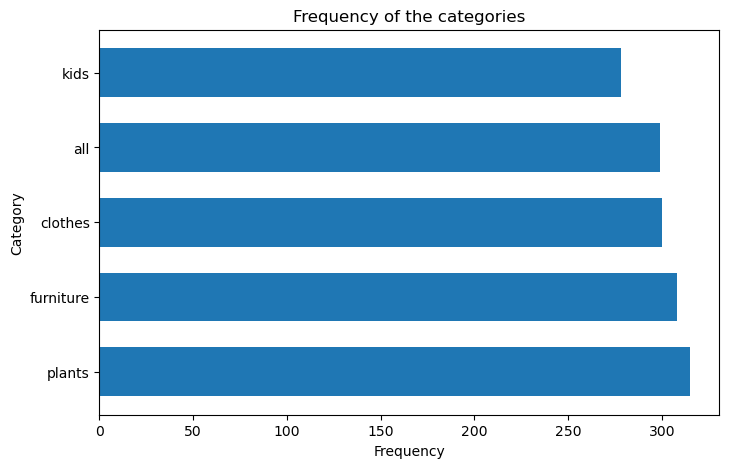

In [182]:
ax = item_df['item_category'].value_counts().plot(kind='barh', 
                                                   figsize=(8,5), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the categories")
ax.set_ylabel("Category")
ax.set_xlabel("Frequency") 

Text(0.5, 0, 'Frequency')

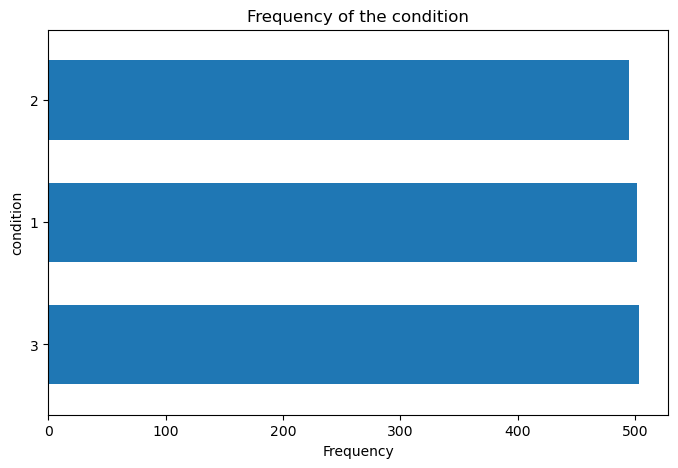

In [183]:
ax = item_df['item_condition'].value_counts().plot(kind='barh', 
                                                   figsize=(8,5), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the condition")
ax.set_ylabel("condition")
ax.set_xlabel("Frequency")

## EDA

In [184]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   item_category    1500 non-null   object
 1   item_condition   1500 non-null   object
 2   item_postcode    1500 non-null   object
 3   item_timer_days  1500 non-null   int64 
 4   n_views          1500 non-null   object
 5   n_likes          1500 non-null   object
 6   item_id          1500 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 93.8+ KB


In [185]:
transform_col_to_num = ['item_condition',  'n_views', 'n_likes', 'item_timer_days']

item_df[transform_col_to_num] = item_df[transform_col_to_num].astype(str).astype(int)
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   item_category    1500 non-null   object
 1   item_condition   1500 non-null   int64 
 2   item_postcode    1500 non-null   object
 3   item_timer_days  1500 non-null   int64 
 4   n_views          1500 non-null   int64 
 5   n_likes          1500 non-null   int64 
 6   item_id          1500 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 93.8+ KB


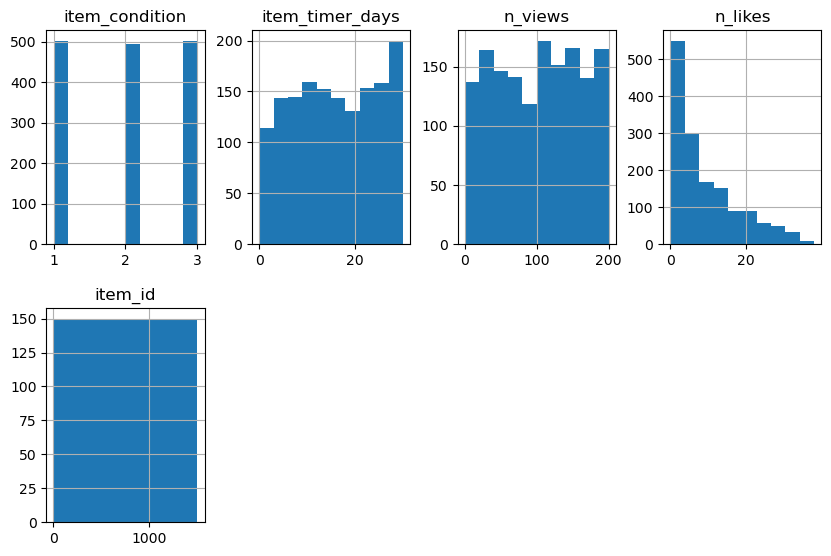

In [186]:
# check distributions
df = item_df
hist = df.hist(figsize=(10,10),layout=(3,4))

The number of likes is righ-skewed distribution. Since the fake data are random, the distrubutions are not being explained here.

/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_41540/4174773288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = item_df.corr()


<Axes: >

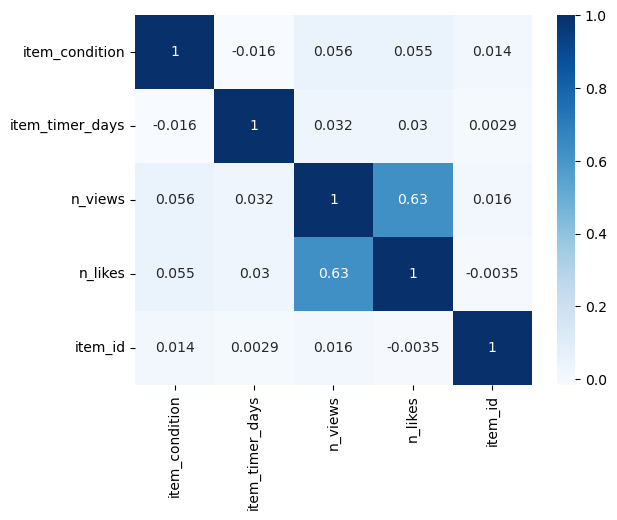

In [187]:
#correlations
corr = item_df.corr()
# corr.style.background_gradient(cmap='blues')
sb.heatmap(corr, cmap="Blues", annot=True)

There are no correlation between variables, except the numbers of likes and views.

## Feature engineering


### Since the dataset is fake, there is no nulls on it.

### One-hot Encoding 

Function to convert categorical variations to numerical ones. The results 0 indicates non-existent while 1 indicates existent.

In [188]:
# columnsToEncode= ['item_category', 'item_condition']

# item_onehot = pd.get_dummies(item_df,columns=columnsToEncode, drop_first=True)
# item_onehot

In [196]:

item_cat_onehot = pd.get_dummies(item_df[['item_category']], prefix="cat", prefix_sep="_")
item_cat_onehot 

# add neighborhood column back to dataframe
item_cat_onehot['item_postcode'] = item_df['item_postcode'] 

# move neighborhood column to the first column
fixed_columns = [item_cat_onehot.columns[-1]] + list(item_cat_onehot.columns[:-1])
item_cat_onehot = item_cat_onehot[fixed_columns]


item_cat_grouped = item_cat_onehot.groupby('item_postcode').mean().reset_index()

# item_onehot.head()

item_cat_grouped.head()

,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1495,0,0,0,0,1
1496,1,0,0,0,0
1497,0,0,1,0,0
1498,0,0,1,0,0


In [190]:

# item_onehot = pd.get_dummies(item_df[['item_category']], prefix="cat", prefix_sep="_")
# item_onehot 

# # add neighborhood column back to dataframe
# item_onehot['item_postcode'] = item_df['item_postcode'] 

# # move neighborhood column to the first column
# fixed_columns = [item_onehot.columns[-1]] + list(item_onehot.columns[:-1])
# item_onehot = item_onehot[fixed_columns]

# item_grouped = item_onehot.groupby('item_postcode').mean().reset_index()

# # item_onehot.head()

# item_grouped.head()

In [209]:
item_df['item_condition'] = item_df['item_condition'].astype(str)

In [210]:
item_cond_onehot = pd.get_dummies(item_df[['item_condition']], prefix="condition", prefix_sep="_")
item_cond_onehot 

# add postcode column back to dataframe
item_cond_onehot['item_postcode'] = item_df['item_postcode'] 

# move neighborhood column to the first column
fixed_columns = [item_cond_onehot.columns[-1]] + list(item_cond_onehot.columns[:-1])
item_cond_onehot = item_cond_onehot[fixed_columns]

item_cond_grouped = item_cond_onehot.groupby('item_postcode').mean().reset_index()

item_onehot.head()

item_cond_grouped.head()

,item_postcode,condition_1,condition_2,condition_3
0,10119,0.250000,0.375000,0.375000
1,10178,0.285714,0.428571,0.285714
2,10179,0.142857,0.285714,0.571429
3,10243,0.375000,0.125000,0.500000
4,10245,0.600000,0.000000,0.400000


#### Sorting

In [211]:

def return_most_common_items(row, num_top_items):
    row_items = row.iloc[1:]
    row_items_sorted = row_items.sort_values(ascending=False)

    return row_items_sorted.index.values[0:num_top_items]



### Top items by postcode

In [218]:
num_top_items = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['item_postcode']

for ind in np.arange(num_top_items):
    try:
        columns.append('{}{} Most Common Items'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Items'.format(ind+1))  

# create a new dataframe
postcodes_cat_sorted = pd.DataFrame(columns=columns)
postcodes_cat_sorted['item_postcode'] = item_cat_grouped['item_postcode']


# for ind in np.arange(item_grouped.shape[0]):
# #     print(postcodes_items_sorted.iloc[ind, 1:]) 
# #     print(return_most_common_items(item_grouped.iloc[ind, :], num_top_venues))
#     postcodes_items_sorted.iloc[ind, 1:] = return_most_common_items(item_grouped.iloc[ind, :], num_top_items)

for ind in np.arange(item_cat_grouped.shape[0]):
    postcodes_cat_sorted.iloc[ind, 1:] = return_most_common_items(item_cat_grouped.iloc[ind, :], num_top_items)

In [219]:
postcodes_cat_sorted.head()

,item_postcode,1st Most Common Items,2nd Most Common Items,3rd Most Common Items,4th Most Common Items,5th Most Common Items
0,10119,cat_kids,cat_plants,cat_all,cat_furniture,cat_clothes
1,10178,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
2,10179,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
3,10243,cat_plants,cat_clothes,cat_all,cat_kids,cat_furniture
4,10245,cat_kids,cat_plants,cat_all,cat_clothes,cat_furniture


In [220]:
num_top_items = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['item_postcode']

for ind in np.arange(num_top_items):
    try:
        columns.append('{}{} Most Common Items'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Items'.format(ind+1))  

# create a new dataframe
postcodes_cond_sorted = pd.DataFrame(columns=columns)
postcodes_cond_sorted['item_postcode'] = item_grouped['item_postcode']


# for ind in np.arange(item_grouped.shape[0]):
# #     print(postcodes_items_sorted.iloc[ind, 1:]) 
# #     print(return_most_common_items(item_grouped.iloc[ind, :], num_top_venues))
#     postcodes_items_sorted.iloc[ind, 1:] = return_most_common_items(item_grouped.iloc[ind, :], num_top_items)

for ind in np.arange(item_grouped.shape[0]):
    postcodes_cond_sorted.iloc[ind, 1:] = return_most_common_items(item_cond_grouped.iloc[ind, :], num_top_items)

In [221]:
postcodes_cond_sorted.head()

,item_postcode,1st Most Common Items,2nd Most Common Items,3rd Most Common Items
0,10119,condition_2,condition_3,condition_1
1,10178,condition_2,condition_1,condition_3
2,10179,condition_3,condition_2,condition_1
3,10243,condition_3,condition_1,condition_2
4,10245,condition_1,condition_3,condition_2


### Cluster postcodes

k-means is used to cluster the postcodes into 5 clusters.

In [195]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'berlin_grouped' is not defined

### Cosine similarity
to calculate user-user and item-item similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Reshape the vectors into 2D arrays
A = A.reshape(1, -1)
B = B.reshape(1, -1)

# Calculate cosine similarity
cosine_similarity = cosine_similarity(A, B)

print(cosine_similarity)


In [ ]:
## CONTINUE FROM HERE: factorization matrix, encoding

### To the Model

In [ ]:
# model_mock_df = pd.DataFrame(create_model_data(1500)).transpose()
# # model_mock_df.head(5)
# model_mock_df.shape

In [ ]:
# model_mock_df.info()

### Creating csv files

In [ ]:
# user_mock_df.to_csv('data/user_mock_data.csv', index=False)

In [ ]:
# item_mock_df.to_csv('data/item_mock_data.csv', index=False)

In [ ]:
# model_mock_df.to_csv('data/model_mock_data.csv', index=False)

## References:
- [Generate custom datasets using Python Faker](https://blogs.sap.com/2021/05/26/generate-custom-datasets-using-python-faker/)
- [folium_polygon_rectangle_layers](https://www.youtube.com/watch?v=9E9FTJrOJ1E&t=752s)
- [Faker](https://github.com/joke2k/faker/issues/1183)
- [Generating Mock Data with Python! (NumPy, Pandas, & Datetime Libraries)](https://www.youtube.com/watch?v=VJBY2eVtf7o)